# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
#Vishwa Added
import sys
import os
import time
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import math                                                       # Importing math module to perform mathematical operations
import cv2                                                        # Importing openCV for image processing
import seaborn as sns                                             # Importing seaborn to plot graphs


# Datastructures to help with reading and manipulating data
import numpy as np
import pandas as pd
# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

sns.set()
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Display images using OpenCV
from google.colab.patches import cv2_imshow                         # Importing cv2_imshow from google.patches to display images

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [ ]:
# loading the dataset
from google.colab import drive
drive.mount('/content/drive')
#VC Added
os.chdir("/content/drive/MyDrive")
#os.listdir()

In [ ]:
# Load the image file of the dataset
images = np.load('images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('Plant_labels.csv')

#Copy the images and labels elsewhere to keep the original
images_backup = np.copy(images)
labels_backup = labels.copy()

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


### Plotting images using OpenCV and matplotlib

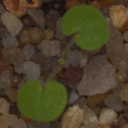

In [ ]:
#Display images using opencv, that uses BGR format
cv2_imshow(images[5])

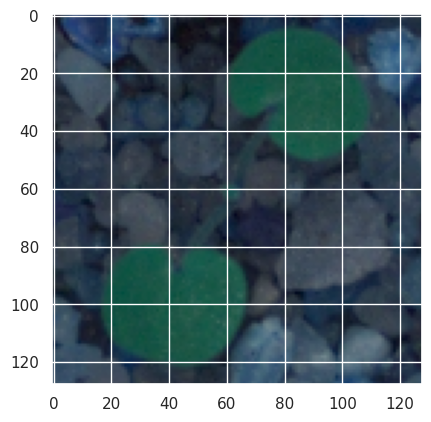

In [ ]:
#Display using matplotlib that uses RGB format
plt.imshow(images[5])

- As you see from above, the images are different when viewed via opencv and plotted via matplotlib.
- We will convert these into RGB for easier interpretation, subsequently in the Data Pre-processing section

Few questions from the Program that would provide some insights for the Project
1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

We shall answer these subsequently

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

###Plot few random images to get a sense of differences across these species

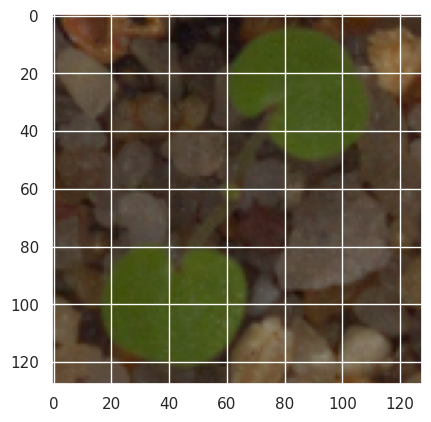

In [ ]:
#Post conversion, lets see how the image looks like:
plt.imshow(images[5])

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes to accomodate all the plant/weed species correctly
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

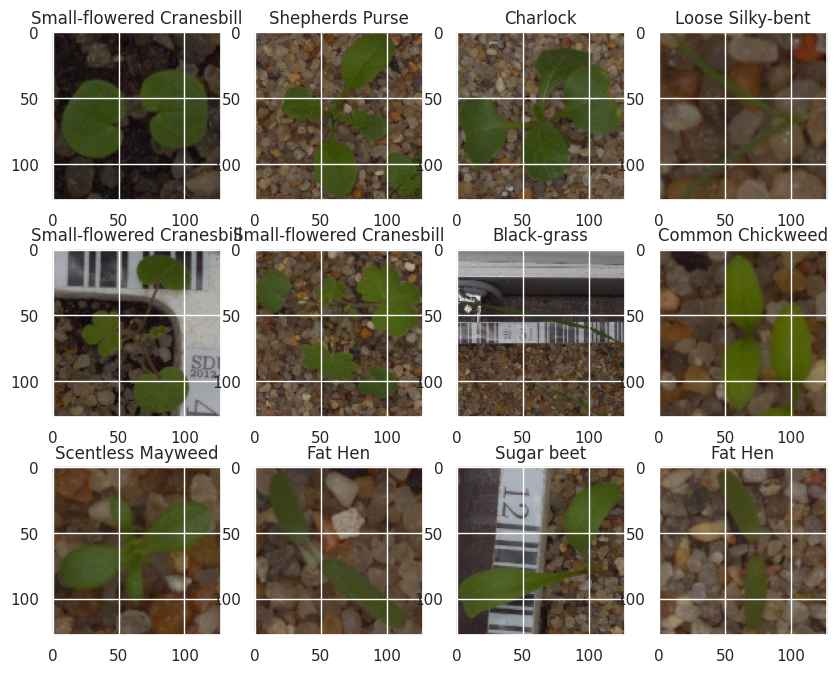

In [ ]:
plot_images(images,labels)

###Key Observations
- Leaf structure: Few leaves are broad and spread out, while some of them are slender. At the outset, it appears that the broad leaves might be easier to categorize
- Presence of fruits might actually help differentiate/ recognize the plant faster, but these set of samples, does not have any fruit in these images.

###Data Imbalance validation

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700')])

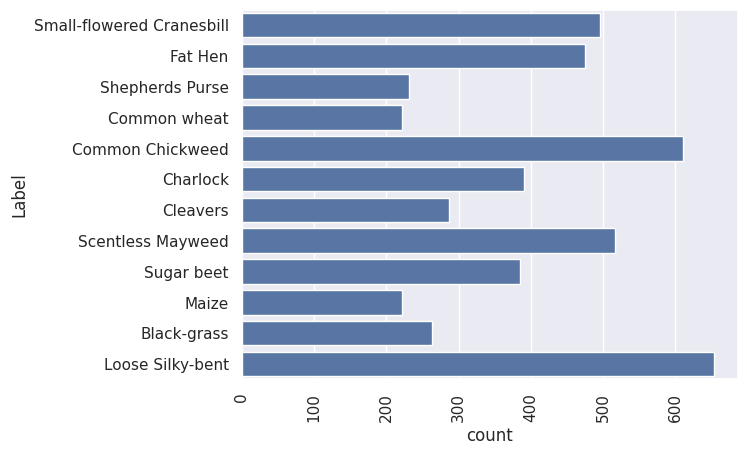

In [ ]:
#Checking for data imbalance
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

In [ ]:
# Check label distribution
label_distribution = labels['Label'].value_counts()
label_distribution

,count
Label,
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263


- As you see from the above image, the data is quite imbalanced with the Most Common being:Loose Silky bent with 654 samples and least common being:  Maize at 221.

- The range of images vary from abou 200 till 650
- Since the data is quite imbalanced, we need to consider data augmentation to balance the training data at some point

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

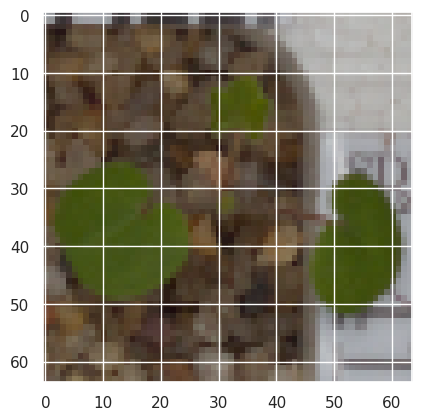

In [ ]:
plt.imshow(images_decreased[2])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
# Lets split the data into Training, validation and Test datasets.
# We shall stick to 70-Training data, 15% Validation Data and 15% Test Data
from sklearn.model_selection import train_test_split
# Split data into training and temp (combined validation and test) sets using stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    images, labels, test_size=0.3, stratify=labels, random_state=42)

# Further split temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
#Let us see how the data split looks like:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3325, 128, 128, 3) (3325, 1)
(712, 128, 128, 3) (712, 1)
(713, 128, 128, 3) (713, 1)


### Encode the target labels

In [ ]:
#Taking this piece of code from the monkey species project
# Convert labels from names to one hot vectors.

# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer

#Lets ensure all the labels are in string format, before using the function
y_train = y_train.astype(str)
y_val = y_val.astype(str)
y_test = y_test.astype(str)

#Now apply the LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
#Lets check the shape
print("Shape of y_train_encoded", y_train_encoded.shape)
print("Shape of y_val_encoded", y_val_encoded.shape)
print("Shape of y_test_encoded", y_test_encoded.shape)


Shape of y_train_encoded (3325, 12)
Shape of y_val_encoded (712, 12)
Shape of y_test_encoded (713, 12)


### Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Model Building - Convolutional Neural Network (CNN)**
Building the CNN model sequentially and adding layers one after the other

###**Model-1: Base Sequential Model+ Two Conv2D Layers + Flatten + Output Layer**

In [ ]:
# Clearing backend. This would help when you are running the model subsequently
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators, to ensure that we get the same data everytime we run the program
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Building the CNN model itself comprising of:
- Feature Extraction Layers: A combination of Convolution Layer and Pooling Layers
  - We shall add the convolution layers in the increasing order or complexity so that simple features are learnt first and subsequently the complex features.
- Connected Classification Layers, for Prediction

In [ ]:
# Create the CNN model
model = Sequential()

# First convolutional layer
#Conv2D Layer performs a convolution operation on the 2D image to extract spatial features like edges, pattern and texture
#Filters: We are deciding to add 64 filters/Kernels. Each of this filter is a matrix that scans the image for a particular feature E.g: A vertical edge or a horizontal edge.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # 3 channels for RGB images

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))

from tensorflow.keras.layers import LeakyReLU
# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.01), input_shape=(128, 128, 3)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Third convolutional layer
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())


# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(12, activation='softmax'))  # For multi-class classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Generating the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,854,188 (7.07 MB)

 Trainable params: 1,854,188 (7.07 MB)

 Non-trainable params: 0 (0.00 B)

Fitting the Model

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/10
104/104 - 12s - 118ms/step - accuracy: 0.2562 - loss: 2.2062 - val_accuracy: 0.4803 - val_loss: 1.6689
Epoch 2/10
104/104 - 2s - 17ms/step - accuracy: 0.4171 - loss: 1.6814 - val_accuracy: 0.5716 - val_loss: 1.3467
Epoch 3/10
104/104 - 1s - 13ms/step - accuracy: 0.4977 - loss: 1.4709 - val_accuracy: 0.5941 - val_loss: 1.2080
Epoch 4/10
104/104 - 1s - 13ms/step - accuracy: 0.5429 - loss: 1.3251 - val_accuracy: 0.6348 - val_loss: 1.1636
Epoch 5/10
104/104 - 1s - 13ms/step - accuracy: 0.5660 - loss: 1.2648 - val_accuracy: 0.6559 - val_loss: 1.0314
Epoch 6/10
104/104 - 1s - 12ms/step - accuracy: 0.6018 - loss: 1.1453 - val_accuracy: 0.6573 - val_loss: 0.9974
Epoch 7/10
104/104 - 1s - 12ms/step - accuracy: 0.6307 - loss: 1.0623 - val_accuracy: 0.6854 - val_loss: 0.9676
Epoch 8/10
104/104 - 3s - 27ms/step - accuracy: 0.6571 - loss: 0.9832 - val_accuracy: 0.6798 - val_loss: 0.9476
Epoch 9/10
104/104 - 1s - 13ms/step - accuracy: 0.6707 - loss: 0.9161 - val_accuracy: 0.7093 - val_los

Observations from the above run:
- The training accuracy of the model is at 64.90% while the validationn accuracy stands at 69.1%
- Both the training and the validation accuracy needs improvement and we inspect mechanisms where in we can improve these model's prediction performance

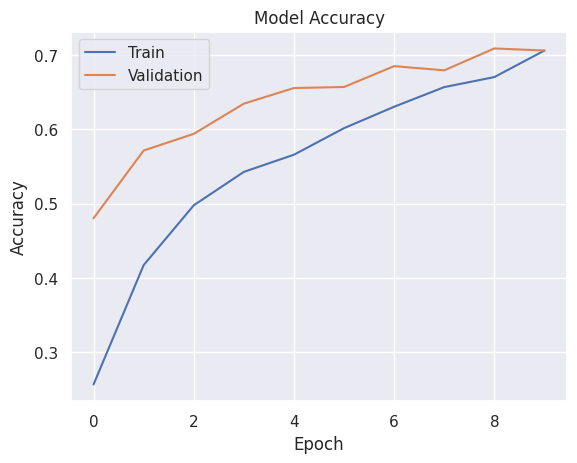

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###**Model-1: Evaluation and Inferences**
**Key Observations:**
The model has a relatively simple architecture with two convolutional layers, each followed by max-pooling. The first convolutional layer has 32 filters, and the second one has the same number.

**Training Accuracy & Loss:**  Training accuracy steadily increased from 25.62% in epoch 1 to 70.65% in epoch 10, showing a steady improvement. This suggests that the model is learning, but there may still be room for optimization to avoid underfitting
 - The training loss decreased consistently from 2.2062 to 0.8576 over 10 epochs, indicating that the model is effectively learning and reducing the error

**Validation Accuracy & Loss:** Validation accuracy rose from 48.03% in epoch 1 to 70.65% in epoch 10, indicating that the model generalizes well to unseen data
- Validation loss decreased from 1.6689 to 0.9406, which is a good sign. However, it did not decrease as quickly as training loss, suggesting some degree of overfitting, especially in the earlier epochs.
    Decreased steadily from 2.2626 to 0.7968, confirming better model generalization.

**Learning Curve:**

Both training and validation accuracies show a clear upward trend, which is promising for this model. The model learns better with each epoch, reaching almost 71% accuracy by the final epoch

**Remarks:**
- With a few more epochs or adjustments (like tuning the learning rate or adding more regularization), this model could reach even better performance, especially in terms of validation loss.
- Model-1 demonstrates a steady improvement in performance, with a good balance between training and validation accuracy. While the model shows promising signs, there is potential for optimization to prevent overfitting, such as reducing the dense layer's size or adding further regularization techniques.

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

NOTE: I have not used this feature in the project, since we are ok with loss decrease

### **Model-2: Model-1 + Data Augmentation**

#### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

 - Lets use data augmentation to improve the accuracy of the model
 - This will include common augmentations like rotation, horizontal flip, zoom, and brightness adjustment to help your model generalize better, especially for the underrepresented classes like Sheperd's Purse, Common wheat, Cleavers, Maize and Black Grass

In [ ]:
#Data Augmentation for the under-represented class
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an ImageDataGenerator instance with augmentation options
data_augmentation = ImageDataGenerator(
    rotation_range=20,         # randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # randomly shift images horizontally
    height_shift_range=0.2,    # randomly shift images vertically
    shear_range=0.2,           # randomly shear images
    zoom_range=0.2,            # randomly zoom into images
    horizontal_flip=True,      # randomly flip images horizontally
    fill_mode='nearest'        # fill missing pixels after transformation
)

- Apply the above augmentation to the data we have, but we use the same model

In [ ]:
# Fit the ImageDataGenerator on your training data if needed
data_augmentation.fit(X_train)

In [ ]:
# Generating the summary of the model
#We will use the same model, used in Model-1 and hence not repeat the same code again here.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 679,286 (2.59 MB)

 Trainable params: 226,428 (884.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 452,858 (1.73 MB)

In [ ]:
history_2 = model.fit(
            data_augmentation.flow(X_train_normalized, y_train_encoded),
            epochs=10,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 - 14s - 131ms/step - accuracy: 0.3832 - loss: 1.8906 - val_accuracy: 0.6728 - val_loss: 1.0695
Epoch 2/10
104/104 - 13s - 128ms/step - accuracy: 0.4361 - loss: 1.6529 - val_accuracy: 0.6798 - val_loss: 1.0637
Epoch 3/10
104/104 - 13s - 128ms/step - accuracy: 0.4538 - loss: 1.5833 - val_accuracy: 0.7037 - val_loss: 0.9854
Epoch 4/10
104/104 - 13s - 127ms/step - accuracy: 0.4797 - loss: 1.5312 - val_accuracy: 0.7065 - val_loss: 0.9900
Epoch 5/10
104/104 - 20s - 192ms/step - accuracy: 0.4944 - loss: 1.4820 - val_accuracy: 0.6966 - val_loss: 0.9781
Epoch 6/10
104/104 - 21s - 205ms/step - accuracy: 0.4857 - loss: 1.4923 - val_accuracy: 0.7163 - val_loss: 0.9514
Epoch 7/10
104/104 - 20s - 193ms/step - accuracy: 0.4995 - loss: 1.4572 - val_accuracy: 0.7051 - val_loss: 1.0176
Epoch 8/10
104/104 - 20s - 196ms/step - accuracy: 0.4983 - loss: 1.4345 - val_accuracy: 0.6924 - val_loss: 0.9741
Epoch 9/10
104/104 - 20s - 197ms/step - accuracy: 0.5050 - loss: 1.3995 - val_accuracy: 0.6643 - va

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model-2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###**Model-2: Evaluation and Inferences**
**Key Observations:**
- The model has a 3-layer convolutional block followed by fully connected (Dense) layers with a dropout layer for regularization.
- The choice of filters in Conv2D layers: 64 filters → 32 filters → 16 filters.

**Training Accuracy & Loss:** The training accuracy improved steadily from 38.32% in Epoch 1 to 50.89% in Epoch 10. This indicates that the model was learning, albeit slowly, over the epochs.
The final accuracy of around 50.89% suggests that the model's ability to correctly classify training samples is limited.The training loss reduced from 1.8906 to 1.4281 over 10 epochs

**Validation Accuracy & Loss:** Validation accuracy improved significantly, from 67.28% in Epoch 1 to a peak of 71.63% in Epoch 6 before fluctuating and stabilizing at 67.28% by Epoch 10.
- The gap between training accuracy (~50.89%) and validation accuracy (~67.28%) implies that the model generalizes better than it performs on training data.
- Validation loss decreased from 1.0695 to 0.9514 by Epoch 6 but then started fluctuating, reaching 1.0686 in Epoch 10.
- This indicates that the model began overfitting or struggling with generalization in the later epochs.

**Learning Curve:**

- Validation accuracy outperformed training accuracy consistently, suggesting that the model is regularized well but lacks the capacity to learn nuanced patterns in the training data

**Remarks:**
- The reduction in the number of filters in deeper layers (from 64 to 16) may limit the model's ability to learn complex patterns in the data
- Given the dataset has imbalanced class distributions, despite data augmentation, the model might be biased toward majority classes, limiting accuracy.

###**Model-3: Model-2 + Third CNN**
Here we add one more convolution as we build and compile the model

In [ ]:
# Clearing backend. This would help when you are running the model subsequently
from tensorflow.keras import backend
backend.clear_session()

Adding Model-2: Data augmentation

In [ ]:
# Create an ImageDataGenerator instance with augmentation options
data_augmentation = ImageDataGenerator(
    rotation_range=20,         # randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # randomly shift images horizontally
    height_shift_range=0.2,    # randomly shift images vertically
    shear_range=0.2,           # randomly shear images
    zoom_range=0.2,            # randomly zoom into images
    horizontal_flip=True,      # randomly flip images horizontally
    fill_mode='nearest'        # fill missing pixels after transformation
)
# Fit the ImageDataGenerator on your training data if needed
data_augmentation.fit(X_train)

In [ ]:
# Create the CNN model - Model-3
model = Sequential()

# First convolutional layer
#Conv2D Layer performs a convolution operation on the 2D image to extract spatial features like edges, pattern and texture
#Filters: We are deciding to add 64 filters/Kernels. Each of this filter is a matrix that scans the image for a particular feature E.g: A vertical edge or a horizontal edge.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # 3 channels for RGB images

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))

from tensorflow.keras.layers import LeakyReLU
# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.01), input_shape=(128, 128, 3)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())


# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(12, activation='softmax'))  # For multi-class classification

In [ ]:
# Compile the Model-3
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the Model-3
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 832,300 (3.17 MB)

 Trainable params: 832,300 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_3 = model.fit(
            data_augmentation.flow(X_train_normalized, y_train_encoded),
            epochs=10,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/10
104/104 - 20s - 192ms/step - accuracy: 0.2051 - loss: 2.3235 - val_accuracy: 0.3048 - val_loss: 1.9917
Epoch 2/10
104/104 - 14s - 131ms/step - accuracy: 0.2740 - loss: 2.1022 - val_accuracy: 0.4045 - val_loss: 1.7973
Epoch 3/10
104/104 - 14s - 131ms/step - accuracy: 0.3146 - loss: 1.9873 - val_accuracy: 0.4438 - val_loss: 1.6875
Epoch 4/10
104/104 - 13s - 129ms/step - accuracy: 0.3480 - loss: 1.8893 - val_accuracy: 0.4972 - val_loss: 1.5438
Epoch 5/10
104/104 - 14s - 132ms/step - accuracy: 0.3660 - loss: 1.7925 - val_accuracy: 0.5126 - val_loss: 1.5094
Epoch 6/10
104/104 - 15s - 148ms/step - accuracy: 0.3817 - loss: 1.7390 - val_accuracy: 0.5323 - val_loss: 1.3870
Epoch 7/10
104/104 - 19s - 185ms/step - accuracy: 0.4051 - loss: 1.6822 - val_accuracy: 0.5548 - val_loss: 1.3581
Epoch 8/10
104/104 - 20s - 190ms/step - accuracy: 0.4271 - loss: 1.6501 - val_accuracy: 0.5604 - val_loss: 1.3187
Epoch 9/10
104/104 - 14s - 135ms/step - accuracy: 0.4165 - loss: 1.6278 - val_accuracy: 

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model-3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###**Model-3: Evaluation and Inferences**
**Model Characteristics:**
- Consists of three convolutional layers with filters of increasing size: 32, 64, and 64.
- Batch normalization and activation layers are applied after certain convolutional layers to improve stability and learning dynamics.
- MaxPooling layers follow each convolutional block to reduce the spatial dimensions and extract prominent features.
- Flatten layer transitions from the convolutional to the dense layers.
- Dense layers: One dense layer with 128 neurons, followed by a dropout layer (likely to prevent overfitting), and a final dense layer for the 12 output classes.

**Total Parameters:**

Approx. 1.6 million parameters for Model 3. This indicates a relatively complex model capable of learning intricate patterns if provided with sufficient data.

**Training Accuracy & Loss:** The training accuracy began at 20.51% in the first epoch and gradually increased to 43.94% by the 10th epoch. The training loss started high at 2.3235 and decreased steadily to 1.5802 over 10 epochs

**Validation Accuracy & Loss:** The validation accuracy started at 30.48% and improved to 59.55% over 10 epochs. The slower improvement in later epochs, with validation accuracy increasing by smaller margins (e.g., from 55.48% to 59.55%), suggests the model may be approaching its capacity to generalize under the current architecture and hyperparameters


**Remarks:**
- This model was run twice: Once with Data augmentation and second time without data augmentation. The performance remained the same.
- Despite improvements, the final validation accuracy (59.55%) is moderate, suggesting the model's current architecture or training setup may not be sufficient to capture the dataset's complexity.
- The slower improvement in validation accuracy across the last few epochs hints at the model reaching its learning potential without further optimization

**Key Decision made**: No further data augmentation for this data set. It does not help

###**Model-4: CNN Model -4: Adding Batch normalization at the 2nd & 3rd CNN Layer**

In [ ]:
# Clearing backend. This would help when you are running the model subsequently
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Create the CNN model - Model-4: Without data augmentation
model = Sequential()

# First convolutional layer
#Conv2D Layer performs a convolution operation on the 2D image to extract spatial features like edges, pattern and texture
#Filters: We are deciding to add 32 filters/Kernels. Each of this filter is a matrix that scans the image for a particular feature E.g: A vertical edge or a horizontal edge.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # 3 channels for RGB images

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))

from tensorflow.keras.layers import LeakyReLU
# Second convolutional layer
#model.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.01), input_shape=(128, 128, 3)))
model.add(Conv2D(64, (3, 3)))

#For Model-4, we shall add Batch Normalization, at the 2nd and 3rd convolution Layer
model.add(BatchNormalization())
#We shall invoke activation post applying normalization to the data.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Third convolutional layer
model.add(Conv2D(64, (3, 3)))
#For Model-4, we shall add Batch Normalization, at the 2nd and 3rd convolution Layer
model.add(BatchNormalization())
#We shall invoke activation post applying normalization to the data.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())


# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(12, activation='softmax'))  # For multi-class classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model-4
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the Model-4
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,664,140 (6.35 MB)

 Trainable params: 1,663,884 (6.35 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
history_4 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=24,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/24
104/104 - 128s - 1s/step - accuracy: 0.1320 - loss: 2.7967 - val_accuracy: 0.1264 - val_loss: 2.4362
Epoch 2/24
104/104 - 117s - 1s/step - accuracy: 0.1666 - loss: 2.4255 - val_accuracy: 0.2135 - val_loss: 2.4494
Epoch 3/24
104/104 - 135s - 1s/step - accuracy: 0.1780 - loss: 2.3707 - val_accuracy: 0.2289 - val_loss: 2.4054
Epoch 4/24
104/104 - 143s - 1s/step - accuracy: 0.1901 - loss: 2.3509 - val_accuracy: 0.2065 - val_loss: 2.4138
Epoch 5/24
104/104 - 131s - 1s/step - accuracy: 0.1946 - loss: 2.3302 - val_accuracy: 0.2402 - val_loss: 2.3110
Epoch 6/24
104/104 - 145s - 1s/step - accuracy: 0.1961 - loss: 2.3204 - val_accuracy: 0.2233 - val_loss: 2.2204
Epoch 7/24
104/104 - 175s - 2s/step - accuracy: 0.1943 - loss: 2.3031 - val_accuracy: 0.1770 - val_loss: 2.3996
Epoch 8/24
104/104 - 144s - 1s/step - accuracy: 0.1982 - loss: 2.2952 - val_accuracy: 0.2121 - val_loss: 2.3514
Epoch 9/24
104/104 - 157s - 2s/step - accuracy: 0.2060 - loss: 2.1992 - val_accuracy: 0.2416 - val_loss:

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model-4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###**Model-4: Evaluation and Inferences**
**Key Observations:**The architecture consists of 3 convolutional layers followed by MaxPooling2D, BatchNormalization, and Activation layers, culminating in a Flatten layer followed by two Dense layers.
- The model uses Dropout for regularization in the dense layer.The number of parameters is quite large, particularly in the Dense layers (1,605,760 parameters).

**Training Accuracy & Loss:** The model begins with poor performance, with a low accuracy (13.2%) and high loss (2.7967) at epoch 1, which improves slightly over the epochs. The loss despite running for higher epochs, is relatively higher.

**Validation Accuracy & Loss:** Validation accuracy starts at 12.64% and gradually increases, peaking around 37.08% at epoch 23, though it fluctuates across different epochs. The validation loss also is higher.

**Learning Curve:**

The model does not seem to overfit significantly as validation loss and accuracy consistently improve alongside training metrics.
Flattening of the validation accuracy curve after epoch 20 suggests the model has started converging.

**Remarks:**
- The model shows slow improvement in terms of both accuracy and validation accuracy.
- The relatively low accuracy and fluctuating performance may indicate that the model is either too complex or lacks sufficient regularization.
- The large number of parameters in the dense layer might be contributing to overfitting or inefficient learning.

###**Model-5: Model-1 with Filters orders reversed**

Lets step back a bit. What is happening? Why are the learning rates so miserably low? Taking a step back and seeing through all the parameters and decisions, I've made.

 - One decision was to keep the layers minimum at the first CNN Layer and then increase the layers.
 - This decision could be making the model learn poorly at the entry layer. Lets reverse the complexity in the order: 64-->32-->16 and see if the model performs better

In [ ]:
# Clearing backend. This would help when you are running the model subsequently
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Create the CNN model - Model-4: Without data augmentation
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # 3 channels for RGB images

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Third convolutional layer
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())


# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(12, activation='softmax'))  # For multi-class classification
# Compile the Model-4
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the Model-4
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,428 (884.48 KB)

 Trainable params: 226,428 (884.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=24,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/24
104/104 - 7s - 70ms/step - accuracy: 0.1798 - loss: 2.3602 - val_accuracy: 0.3455 - val_loss: 2.0084
Epoch 2/24
104/104 - 2s - 20ms/step - accuracy: 0.3501 - loss: 1.9417 - val_accuracy: 0.4382 - val_loss: 1.6781
Epoch 3/24
104/104 - 2s - 23ms/step - accuracy: 0.4171 - loss: 1.7009 - val_accuracy: 0.4888 - val_loss: 1.5150
Epoch 4/24
104/104 - 2s - 24ms/step - accuracy: 0.4334 - loss: 1.6095 - val_accuracy: 0.5604 - val_loss: 1.4197
Epoch 5/24
104/104 - 3s - 24ms/step - accuracy: 0.4866 - loss: 1.4792 - val_accuracy: 0.5534 - val_loss: 1.2636
Epoch 6/24
104/104 - 2s - 18ms/step - accuracy: 0.5212 - loss: 1.3869 - val_accuracy: 0.5997 - val_loss: 1.1827
Epoch 7/24
104/104 - 2s - 18ms/step - accuracy: 0.5558 - loss: 1.2392 - val_accuracy: 0.6292 - val_loss: 1.1022
Epoch 8/24
104/104 - 3s - 27ms/step - accuracy: 0.5955 - loss: 1.1438 - val_accuracy: 0.6601 - val_loss: 1.0242
Epoch 9/24
104/104 - 2s - 22ms/step - accuracy: 0.6156 - loss: 1.0865 - val_accuracy: 0.6489 - val_loss:

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model-5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###**Model-5: Evaluation and Inferences**
**Key Observations:**

Model 5 utilized a reversed filter order compared to Model 1, starting with a larger number of filters in the initial Conv2D layer and gradually reducing them in subsequent layers. This approach likely helped in capturing finer details in the earlier layers while focusing on high-level features in deeper layers

**Training Accuracy & Loss:** Training accuracy increased from 17.98% in Epoch 1 to 78.59% in Epoch 24, indicating effective learning throughout training.

**Validation Accuracy & Loss:** Validation accuracy followed a similar trend, starting at 34.55% and peaking at 74.30% in Epoch 22 before plateauing.
Validation loss decreased significantly during the early epochs, suggesting the model was effectively minimizing its objective function

**Learning Curve:**

- Validation accuracy plateaued after Epoch 20, and validation loss started fluctuating, indicating potential overfitting.
- The best validation accuracy achieved was 74.30% at Epoch 22, with a corresponding validation loss of approximately 0.9114.
- The model successfully converged, with the final training loss being 0.5453, indicating effective optimization.

**Remarks:**

- Reversing the filter order appears to have positively impacted the model's performance compared to earlier architectures, achieving higher accuracy and potentially learning better feature representations.
- This suggests that starting with a higher number of filters in initial layers captured finer details more effectively, improving classification performance

###**Model-6: Model-5 + Batch Normalization with Data Augmentation with Filters orders reversed**

In [ ]:
# Clearing backend. This would help when you are running the model subsequently
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Data Augmentation for the under-represented class
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an ImageDataGenerator instance with augmentation options
data_augmentation = ImageDataGenerator(
    rotation_range=20,         # randomly rotate images in the range (degrees)
    width_shift_range=0.2,     # randomly shift images horizontally
    height_shift_range=0.2,    # randomly shift images vertically
    shear_range=0.2,           # randomly shear images
    zoom_range=0.2,            # randomly zoom into images
    horizontal_flip=True,      # randomly flip images horizontally
    fill_mode='nearest'        # fill missing pixels after transformation
)

In [ ]:
# Fit the ImageDataGenerator on your training data if needed
data_augmentation.fit(X_train)

In [ ]:
# Create the CNN model - Model-4: Without data augmentation
model = Sequential()

# First convolutional layer

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # 3 channels for RGB images
# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Third convolutional layer
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())


# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(12, activation='softmax'))  # For multi-class classification
# Compile the Model-4
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the Model-4
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,428 (884.48 KB)

 Trainable params: 226,428 (884.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_6 = model.fit(
            data_augmentation.flow(X_train_normalized, y_train_encoded),
            epochs=25,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 - 20s - 191ms/step - accuracy: 0.1561 - loss: 2.4200 - val_accuracy: 0.2458 - val_loss: 2.2344
Epoch 2/25
104/104 - 14s - 138ms/step - accuracy: 0.2460 - loss: 2.1931 - val_accuracy: 0.3174 - val_loss: 1.9651
Epoch 3/25
104/104 - 14s - 136ms/step - accuracy: 0.2866 - loss: 2.0415 - val_accuracy: 0.3596 - val_loss: 1.7902
Epoch 4/25
104/104 - 20s - 195ms/step - accuracy: 0.2983 - loss: 1.9657 - val_accuracy: 0.4045 - val_loss: 1.7230
Epoch 5/25
104/104 - 14s - 132ms/step - accuracy: 0.3182 - loss: 1.9035 - val_accuracy: 0.3722 - val_loss: 1.6611
Epoch 6/25
104/104 - 21s - 201ms/step - accuracy: 0.3332 - loss: 1.8656 - val_accuracy: 0.3947 - val_loss: 1.6809
Epoch 7/25
104/104 - 14s - 134ms/step - accuracy: 0.3402 - loss: 1.8570 - val_accuracy: 0.4284 - val_loss: 1.5934
Epoch 8/25
104/104 - 14s - 139ms/step - accuracy: 0.3552 - loss: 1.8079 - val_accuracy: 0.4846 - val_loss: 1.6130
Epoch 9/25
104/104 - 14s - 137ms/step - accuracy: 0.3636 - loss: 1.7622 - val_accuracy: 0.5183 - va

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model-6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###**Model-6: Evaluation and Inferences**


**Key Observations:**
Model 6 added Data augmentation to validate if the performance improves

**Training Accuracy & Loss:** The training accuracy steadily improves from 15.61% (Epoch 1) to around 48.7.
Training loss decreases from 2.4 to 1.4, indicating that the model is learning patterns from the data.

**Validation Accuracy & Loss:** Validation accuracy shows consistent improvement, starting at 24.5% (Epoch 1) and reaching around 63.2%

Validation loss decreases from 2.23 --> 1.09 steadily.

**Learning Curve:**
 The model's performance is getting stabilized around Epoch 9 - 15, post which you see a jump in the performance.
 The performance jumps upto 57.3% and after few minor losses, recoups back to 63.62% eventually. The model has moved out of the plateau region of learning

**Remarks:**
  - The validation accuracy of 63.2% suggests the model can distinguish between classes better than random guessing.
  - Validation loss of 1.09 indicates the model has room for improvement, especially in learning more distinct class boundaries



###**Model-7: Model-5 + With EarlyStopping**


In [ ]:
# Clearing backend. This would help when you are running the model subsequently
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Create the CNN model - Model-4: Without data augmentation
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # 3 channels for RGB images
# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Third convolutional layer
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(12, activation='softmax'))  # For multi-class classification
# Compile the Model-4
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the Model-4
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 61, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,428 (884.48 KB)

 Trainable params: 226,428 (884.48 KB)

 Non-trainable params: 0 (0.00 B)

- Let us define a method that saves the best model that has the highest accuracy

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Metric to monitor ('val_loss' or 'val_accuracy')
    patience=7,           # Number of epochs with no improvement after which training stops
    restore_best_weights=True  # Restore weights from the epoch with the best monitored metric
)

#from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint to save the model with best validation accuracy
#checkpoint = ModelCheckpoint(
#    'best_model_epoch_{epoch:02d}.keras',  # Save model with epoch number and .keras extension
#    monitor='val_accuracy',                # Monitor validation accuracy
#    save_best_only=True,                   # Save only the best model
#    mode='max',                            # We want to maximize the validation accuracy
#    verbose=1                              # Print progress
#)

# Fit the model with EarlyStopping
history_7 = model.fit(
    X_train_normalized, y_train_encoded,
    epochs=35,  # Use a higher epoch count to allow EarlyStopping to work
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    callbacks=[early_stopping],  # Include the early stopping
    verbose=2
)

Epoch 1/35
104/104 - 7s - 67ms/step - accuracy: 0.2012 - loss: 2.3262 - val_accuracy: 0.3371 - val_loss: 2.0121
Epoch 2/35
104/104 - 2s - 18ms/step - accuracy: 0.3374 - loss: 1.9579 - val_accuracy: 0.4775 - val_loss: 1.6118
Epoch 3/35
104/104 - 2s - 19ms/step - accuracy: 0.4141 - loss: 1.6837 - val_accuracy: 0.5126 - val_loss: 1.4111
Epoch 4/35
104/104 - 2s - 23ms/step - accuracy: 0.4863 - loss: 1.4965 - val_accuracy: 0.6138 - val_loss: 1.2014
Epoch 5/35
104/104 - 2s - 23ms/step - accuracy: 0.5137 - loss: 1.3627 - val_accuracy: 0.6404 - val_loss: 1.0957
Epoch 6/35
104/104 - 3s - 24ms/step - accuracy: 0.5621 - loss: 1.2434 - val_accuracy: 0.6657 - val_loss: 0.9939
Epoch 7/35
104/104 - 2s - 17ms/step - accuracy: 0.5805 - loss: 1.1603 - val_accuracy: 0.6756 - val_loss: 0.9755
Epoch 8/35
104/104 - 2s - 17ms/step - accuracy: 0.6138 - loss: 1.0777 - val_accuracy: 0.7079 - val_loss: 0.8737
Epoch 9/35
104/104 - 3s - 25ms/step - accuracy: 0.6244 - loss: 1.0446 - val_accuracy: 0.6882 - val_loss:

In [ ]:
# Extract validation accuracy and loss from history
val_acc = history_7.history['val_accuracy']
val_loss = history_7.history['val_loss']

# Identify the epoch with the highest validation accuracy
best_epoch = val_acc.index(max(val_acc)) + 1  # Add 1 because epochs are 1-indexed
best_val_acc = max(val_acc)
best_val_loss = val_loss[val_acc.index(best_val_acc)]

print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"Corresponding Validation Loss: {best_val_loss:.4f}")
print(f"Achieved at Epoch: {best_epoch}")

Best Validation Accuracy: 0.7697
Corresponding Validation Loss: 0.7742
Achieved at Epoch: 22


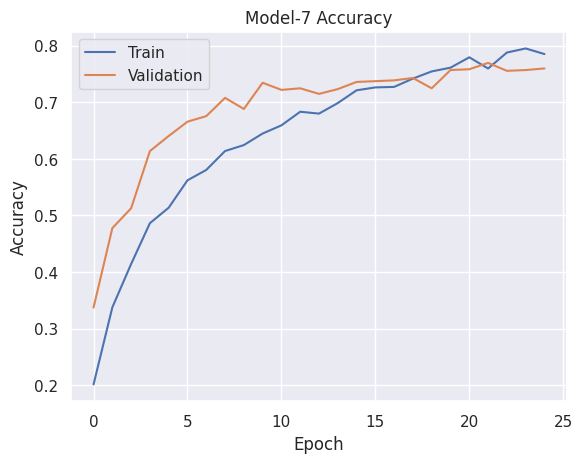

In [ ]:
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model-7 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Save the Best Model

In [ ]:
model.save('best_plant_classifier.keras')
print("Model saved as 'best_plant_classifier.keras'")

Model saved as 'best_plant_classifier.keras'


###**Model-7 Evaluation and Inferences**

**Key Observations:**
A small model, relatively simple with 226,428 parameters and it avoids excessive overfitting
Decision to increase the epochs to higher

**Training Accuracy:** Started at 20% (epoch 1) and increased steadily, reaching ~78.8%  up at a later stage around epoch 23. There is a steady increase with each epoch, showing stabalized learning

**Validation Accuracy:** Validation accuracy stabilizes around 71-73% in the middle rounds, but picks up pace with minor fluctuations. Validation loss shows a consistent steady decrease uptil epoch 23.
 - The best validation accuracy (~76.97%) is achieved around Epoch 22, with a corresponding validation loss of 0.7742.
- The model begins to overfit the training data as the validation performance stagnates while training accuracy improves.

**Validation Loss**: validation loss decreasing from 2.01 to 0.87 showing steady improvement

**Learning Curve:**

The model is learning effectively during the initial stages, indicating that the architecture and optimizer are reasonably well-suited to the task

**Remarks:**
 - This model has performed the best with highest validation accuracy of 76%, while the training accuracy being 78.5%
 - Imbalanced Classes: The model performs better with imbalanced data as against augmenting the data that we saw previously.
 - The number of epochs were experimented and found to be optimal at 24.
 -There was an attempt made to run with 35 epochs, but the performance started to degenerate slowly. Hence the introduction of Early Stopping in the Model fitting.
 - In Early Stopping : Patience level of 3, 5 and 7 were tried. 3 was found to be too hasty decision, while 7 was depicted as late. Hence finalized the Patience level of 5 that was balanced.

## **Model Aggregation and a holistic view across all the models executed**

**MODEL-1** -This model demonstrates consistent learning, although the accuracy is still moderate, which suggests potential for improvement but not the best candidate for high-performance tasks, particularly if the task demands higher accuracy

**MODEL-2** -Despite achieving a higher validation accuracy than Model-1, the overall performance seems stagnant, with minimal improvement after the initial epochs. This indicates that the model may not have a good generalization ability, suggesting that it might benefit from changes in architecture or hyperparameters.

**MODEL-3** -This model shows slow progress and struggles with learning, even after 10 epochs. The improvements are marginal, and the validation accuracy is relatively low, indicating a need for a different approach or significant architectural changes

**MODEL-4** -This model is underperforming significantly, and the learning curve is flat. It's highly likely that this model suffers from issues such as inappropriate model architecture or hyperparameters, which need immediate revision for any improvements.

**MODEL-5** -This model performs better than Model-3 and Model-4, with significant improvements in the latter stages. While the accuracy is relatively high, further tuning or regularization might be necessary to refine the model and avoid potential overfitting. The trick of reversing the complexity of the filters worked.

**MODEL-6** -This model shows solid performance, with a good balance between training accuracy and validation accuracy. It is likely one of the better candidates among the models, with stable learning and consistent improvements in both training and validation.However the accuracy is not upto the mark.

**MODEL-7** -Best Choice: Model-7 stands out as the top performer, consistently showing the highest accuracy (train and validation) and achieving a stable low loss. Models like Model-6 also show promising results, but Model-7's overall performance makes it a better candidate for deployment or further refinement.

###**Model Evaluation on Test Data**

We have finalized Model-7 and we would like to run this with the Test data

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7237, Test Loss: 0.8818


In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)
y_pred

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[3.6930621e-02, 4.6599402e-10, 8.4665946e-05, ..., 5.9193331e-07,
        1.4936838e-08, 6.7959412e-04],
       [9.6761336e-04, 1.7888254e-03, 4.6853114e-02, ..., 2.0313065e-03,
        1.8857820e-03, 5.8279252e-01],
       [3.4112372e-03, 4.9445508e-03, 3.9686818e-02, ..., 2.4724688e-02,
        3.5342004e-02, 3.0213041e-02],
       ...,
       [4.4475790e-05, 4.0402552e-01, 2.7997133e-01, ..., 2.9480051e-02,
        3.2783769e-02, 1.8261109e-01],
       [1.5637505e-07, 4.3993886e-08, 1.2164537e-07, ..., 2.8681121e-04,
        9.4758885e-05, 4.0274428e-04],
       [1.2507031e-02, 4.1210040e-04, 1.9252062e-02, ..., 1.3534066e-02,
        4.9106113e-04, 9.6509084e-02]], dtype=float32)

### Checking with the confusion Matrix

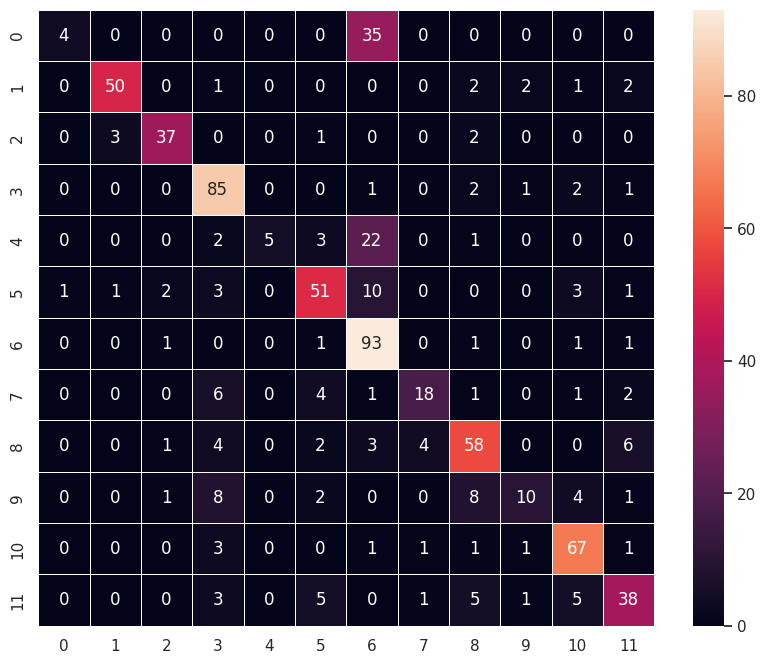

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations
 - We see from the matrix that Plant species: 3, 6 are best represented and the model is very accurate
 - We see that model reasonably recognizes Plant species: 8 & 10.
 - The model only succeeds 50% of the time, in identifying Plant species 1 and 5
 - Model performs poorly in recognizing species 2 and 11 with only about 37% accuracy
 - Model fails to recognize Plant species-0, 4, 7 and 9..



## Actionable Insights and Business Recommendations

### Plants: Small-flowered Cranesbill(3) and Sugar Beet(6): Best Represented and Highly Accurate Recommendation(85 & 90%)

- Since these species are accurately classified, they can be prioritized for targeted conservation or business efforts. These can be promoted as "flagship species" for awareness programs.
- Conservation and Research: Allocate more resources towards the monitoring and research of these species since the model has shown strong recognition of these.
- Collaborations: Collaborate with NGOs or research institutions that focus on these species.

### Plants: Black Grass(8) and Common Wheat(10): Reasonably Recognized(58 - 67%)

- While the model does recognize these species reasonably well, there’s still room for improvement.
- Further Training/Improvement: Consider gathering more data for these species to fine-tune the model for better accuracy.
- Targeted Data Collection: Use more images of Black Grass and Common wheat under various environmental conditions to improve the model's ability to recognize these species more reliably.
- Focus on Education and Awareness: These species could be used in educational campaigns with a focus on the ongoing work to improve their recognition.

### Plants: Common Chickweed(1) and Charlock(5): 50% Accuracy
- Recommendation: The model's performance on species 1 and 5 is borderline, so there’s potential for optimization here.
- More samples needed to finetune the model here. Increase the diversity of the sample photographs that would contstitute the training set incorporating different conditions, lighting, and angles, which could improve the model's recognition accuracy.
- Field Monitoring: In parallel, deploy field experts to monitor and collect more detailed images of these species to address this gap in model performance.

### Plants: Scentless Mayweed(2) and Maize(11): Only 37% Accuracy
Recommendation: The poor performance on species 2 and 11 suggests a need for urgent intervention.
Data Collection Focus: Collect more labeled images of these species, possibly with more variety (e.g., different stages of growth, different environmental conditions).
Quality Control of Data: Ensure that the images used for training are of high quality and reflect a diverse set of scenarios.
Expert Review: Have experts in the field review the images of these species to ensure they are correctly labeled, as mislabeling can significantly affect model performance.
Hybrid Approach: Combine machine learning with expert systems to manually classify these species when the model is uncertain.
### Plants: Loose Silky Bent(0), Fat Hen(4), Cleavers(7), and Sheperds Purse(9) with (4, 5, 18, 10%) accuracy : Failing to Recognize
- Recommendation: The failure to recognize these species suggests that more drastic measures are needed.
- Urgent Data Augmentation: These species need substantial data augmentation and possibly a more extensive dataset with varied environmental conditions and backgrounds. This could also involve gathering images from different seasons and locations.
- External Expertise: Engage with botanical experts or local field teams to help identify more samples of these species for further training.
- Manual Identification Tools: Implement a manual verification process when species 4, 7, or 9 are encountered to prevent incorrect identification and ensure accuracy.
- Cross-Model Validation: Try using other models (e.g., transfer learning from a different domain) and compare their performance to see if they handle these species better.

### General Observations
- Model Refinement: Regularly update the model with new data, especially focusing on species that show poor or moderate performance.
- Monitoring and Feedback Loop: Implement a feedback loop where any misidentified plant species can be flagged for further analysis, contributing to the improvement of the dataset and model.
- Customer Education: For plant species that are well-recognized by the model, use them in educational campaigns or showcase them as examples of conservation success, while also communicating that ongoing efforts are being made to improve the model for other species.









_____